# Análise Descritiva dos Dados (EDA)  
  
Referente à base de dados "receitas.json"

[0. Importação](#section_00)  

[1. Análise das variáveis numéricas](#section_10)  

- [1.1 Limpeza e tratamento dos dados](#section_11)  
    
- [1.2 Correlações](#section_12)  
   
[2. Análise das variáveis textuais](#section_20)  

[3. Conclusões & Insights](#section_40)  


#### Importação <a id='section_00'></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from unidecode import unidecode
from wordcloud import WordCloud

#nltk.download('wordnet')
#nltk.download('stopwords')

In [2]:
raw = pd.read_json('receitas.json')
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20130 entries, 0 to 20129
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   directions   20111 non-null  object             
 1   fat          15908 non-null  float64            
 2   date         20111 non-null  datetime64[ns, UTC]
 3   categories   20111 non-null  object             
 4   calories     15976 non-null  float64            
 5   desc         13495 non-null  object             
 6   protein      15929 non-null  float64            
 7   rating       20100 non-null  float64            
 8   title        20111 non-null  object             
 9   ingredients  20111 non-null  object             
 10  sodium       15974 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(5), object(5)
memory usage: 1.7+ MB


In [3]:
raw.head()

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium
0,"[1. Place the stock, lentils, celery, carrot, ...",7.0,2006-09-01 04:00:00+00:00,"[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...",426.0,None,30.0,2.500,"Lentil, Apple, and Turkey Wrap","[4 cups low-sodium vegetable or chicken stock,...",559.0
1,[Combine first 9 ingredients in heavy medium s...,23.0,2004-08-20 04:00:00+00:00,"[Food Processor, Onion, Pork, Bake, Bastille D...",403.0,This uses the same ingredients found in boudin...,18.0,4.375,Boudin Blanc Terrine with Red Onion Confit,"[1 1/2 cups whipping cream, 2 medium onions, c...",1439.0
2,[In a large heavy saucepan cook diced fennel a...,7.0,2004-08-20 04:00:00+00:00,"[Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...",165.0,None,6.0,3.750,Potato and Fennel Soup Hodge,"[1 fennel bulb (sometimes called anise), stalk...",165.0
3,[Heat oil in heavy large skillet over medium-h...,NaN,2009-03-27 04:00:00+00:00,"[Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...",NaN,The Sicilian-style tomato sauce has tons of Me...,NaN,5.000,Mahi-Mahi in Tomato Olive Sauce,"[2 tablespoons extra-virgin olive oil, 1 cup c...",NaN
4,[Preheat oven to 350°F. Lightly grease 8x8x2-i...,32.0,2004-08-20 04:00:00+00:00,"[Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...",547.0,None,20.0,3.125,Spinach Noodle Casserole,"[1 12-ounce package frozen spinach soufflé, th...",452.0


# Análise exploratória das variáveis numéricas <a id='section_10'></a>

In [4]:
nraw = raw.select_dtypes(include=['float64'])

In [5]:
nraw.isnull().sum()

fat         4222
calories    4154
protein     4201
rating        30
sodium      4156
dtype: int64

In [6]:
nraw.describe()

,fat,calories,protein,rating,sodium
count,1.590800e+04,1.597600e+04,15929.000000,20100.000000,1.597400e+04
mean,3.460975e+02,6.307857e+03,99.946199,3.713060,6.211474e+03
std,2.043102e+04,3.585851e+05,3835.616663,1.343144,3.328903e+05
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,7.000000e+00,1.980000e+02,3.000000,3.750000,8.000000e+01
50%,1.700000e+01,3.310000e+02,8.000000,4.375000,2.940000e+02
75%,3.300000e+01,5.860000e+02,27.000000,4.375000,7.110000e+02
max,1.722763e+06,3.011122e+07,236489.000000,5.000000,2.767511e+07


In [7]:
def plot_distribution(df, column_name):
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df[column_name], kde=True, bins=30)
    plt.title(f"{column_name} - Histogram")
    plt.xlabel(column_name)
    plt.ylabel("Frequency")
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column_name])
    plt.title(f"{column_name} - Boxplot")
    plt.xlabel(column_name)
    
    plt.tight_layout()
    plt.show()

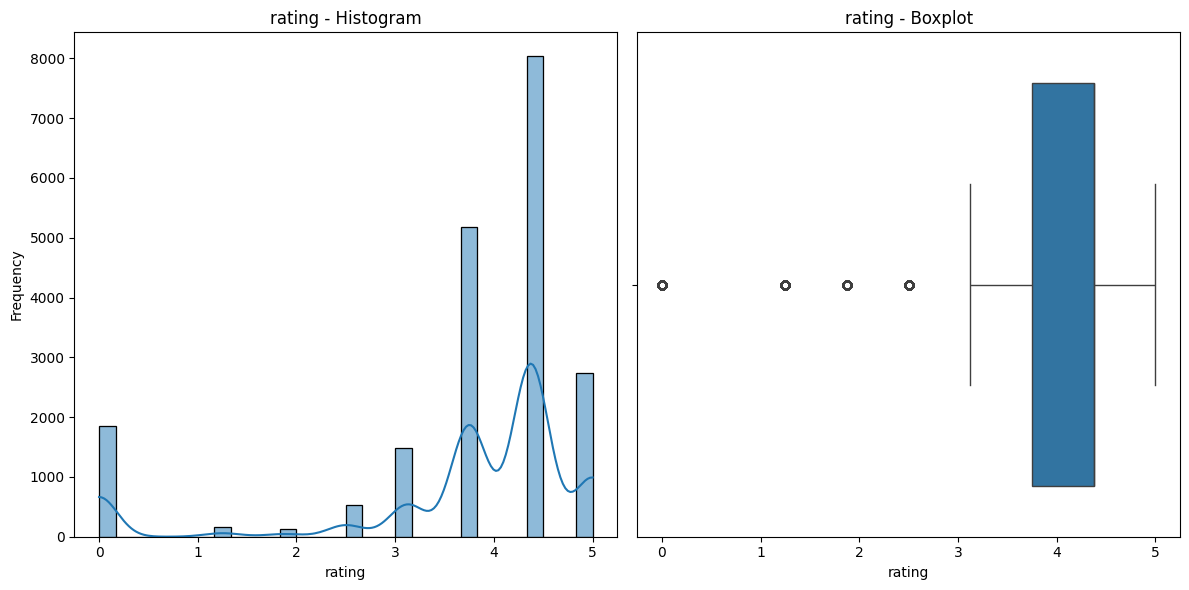

In [8]:
plot_distribution(nraw, "rating")

In [9]:
nraw["rating"].value_counts().sort_index(ascending=False)

rating
5.000    2731
4.375    8033
3.750    5174
3.125    1489
2.500     536
1.875     124
1.250     164
0.000    1849
Name: count, dtype: int64

Os resultados acima sugerem que os usuários tendem a expressar a reprovação ou desgosto com mais entusiasmo do que a aprovação.  
  
Ao mesmo tempo, é difícil mensurar a significância da variável sem saber a quantidade de avaliações de usuário para cada receita.

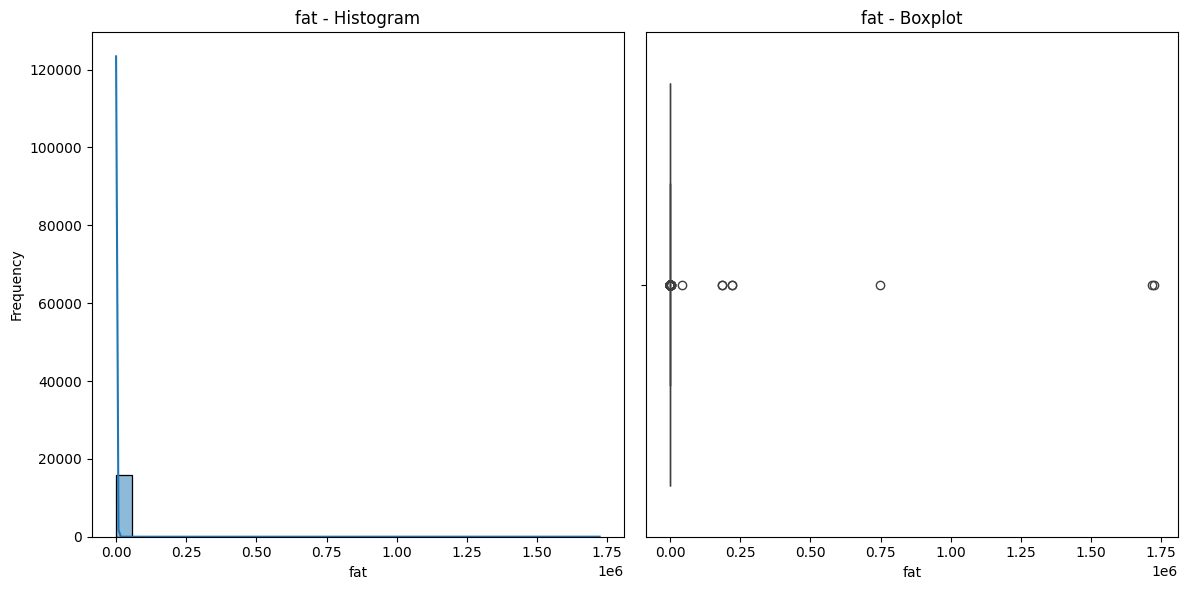

In [10]:
plot_distribution(nraw, "fat")

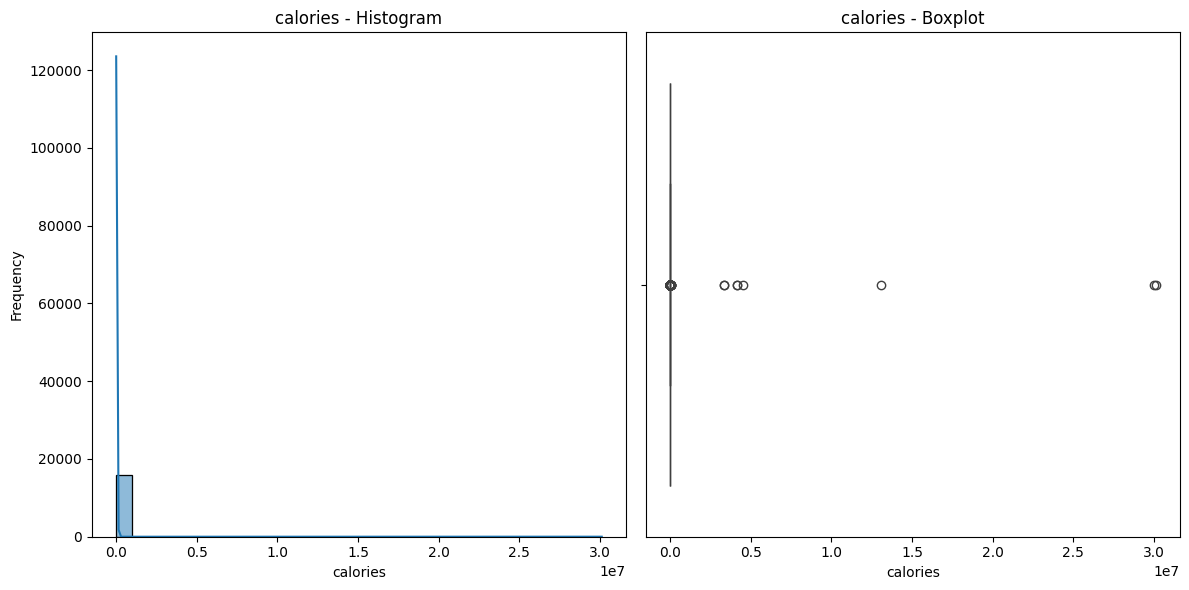

In [11]:
plot_distribution(nraw, "calories")

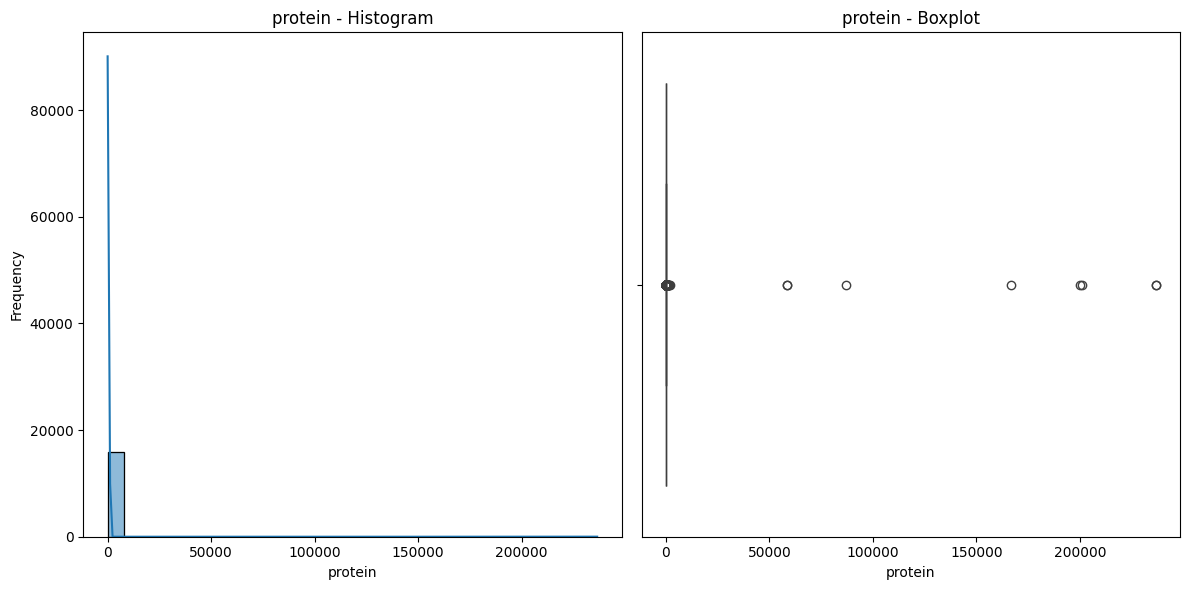

In [12]:
plot_distribution(nraw, "protein")

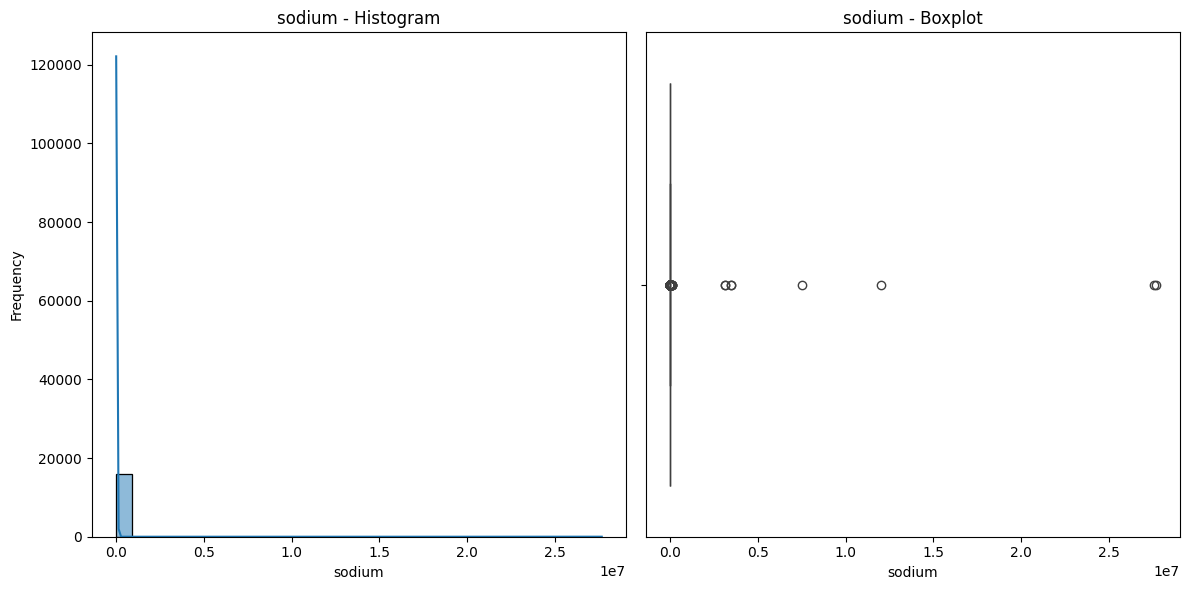

In [13]:
plot_distribution(nraw, "sodium")

## Limpeza & tratamento dos dados <a id='section_11'></a>

### Correção de Unidades  
  
#### Premissas:  
1. Valores de sódio abaixo de 100 devem estar em **gramas (g)**, multiplicaremos por 1 000 para lidar **com miligramas (mg)**  
2. Valores de calorias acima de 1 000 000 devem estar em **caloria (cal)**, dividiremos por 1 000 para lidar com **kilocalorias** ou **Calorias (kcal)**

In [14]:
ndf = nraw.copy()

ndf["sodium"] = ndf["sodium"].apply(lambda x: x*1000 if x < 100 else x)
ndf["calories"] = ndf["calories"].apply(lambda x: x/1000 if x > 1000000 else x)

ndf.describe()

,fat,calories,protein,rating,sodium
count,1.590800e+04,15976.000000,15929.000000,20100.000000,1.597400e+04
mean,3.460975e+02,509.872704,99.946199,3.713060,1.578165e+04
std,2.043102e+04,956.814697,3835.616663,1.343144,3.334267e+05
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00
25%,7.000000e+00,198.000000,3.000000,3.750000,3.220000e+02
50%,1.700000e+01,331.000000,8.000000,4.375000,7.905000e+02
75%,3.300000e+01,586.000000,27.000000,4.375000,4.000000e+03
max,1.722763e+06,54512.000000,236489.000000,5.000000,2.767511e+07


### Remoção dos Outliers restantes  
  
Não foi encontrada nenhuma informação que justificasse outro tratamento aos demais outliers que não a **exclusão**.   

Como ainda não foi encontrada nenhuma evidência de **Normalidade** nos dados, optou-se por remover os outliers usando o **intervalo interquartil (IQR)** como referência (e não Z-scores).

Poderia ter-se usado também um intervalo em torno da média definido pelo **desvio padrão (std)**, mas como visto na tabela acima o mesmo se mostrou muito sensível à presença dos outliers encontrados na base de dados, apresentado ordem de grandeza muito acima da mediana e demais quartis

In [15]:
def remove_outliers_iqr(df, columns):
    df_cleaned = df.copy()
    
    for column in columns:
        Q1 = df_cleaned[column].quantile(0.25)
        Q3 = df_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df_cleaned[column] = df_cleaned[column].mask((df_cleaned[column] < lower_bound) | (df_cleaned[column] > upper_bound), np.nan)
    
    return df_cleaned

In [16]:
clean_ndf = remove_outliers_iqr(ndf, ["fat", "calories", "protein", "sodium"])
clean_ndf.describe()

,fat,calories,protein,rating,sodium
count,14803.000000,14957.000000,14811.000000,20100.000000,12662.000000
mean,19.827197,377.330013,13.798123,3.713060,1088.593429
std,16.814751,253.655173,15.211186,1.343144,1542.456917
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,190.000000,3.000000,3.750000,260.000000
50%,16.000000,309.000000,7.000000,4.375000,539.000000
75%,29.000000,520.000000,21.000000,4.375000,1125.000000
max,72.000000,1168.000000,63.000000,5.000000,9478.000000


## Ausência de escala / dimensões

Como as receitas não tem um padrão de tamanho nem uma porção especificada e os valores das variáveis numéricas não tem uma unidade específica, uma opção mais significativa para os **Macronutrientes (protein & fat)** seria representa-los em função de sua **razão sobre o total de calorias**.

In [17]:
clean_ndf["fat_ratio"] = clean_ndf["fat"] / clean_ndf["calories"]
clean_ndf["protein_ratio"] = clean_ndf["protein"] / clean_ndf["calories"]

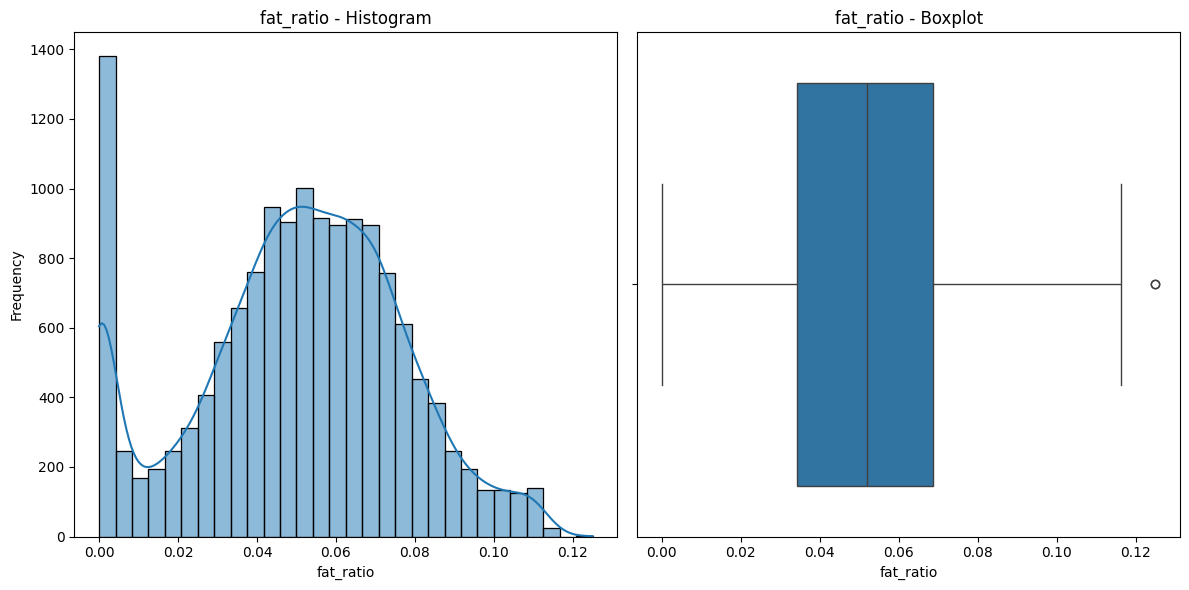

In [18]:
plot_distribution(clean_ndf, "fat_ratio")

O pico observado no valor 0 indica uma quantidade significativa de receitas que não possui teor relevante de gorduras, por não ocorrer naturalmente nos ingredientes usados ou por determinações intencionais para tornar a receita mais acessível, dado o número de pessoas com restrições alimentares que devem evitar o consumo de gorduras.

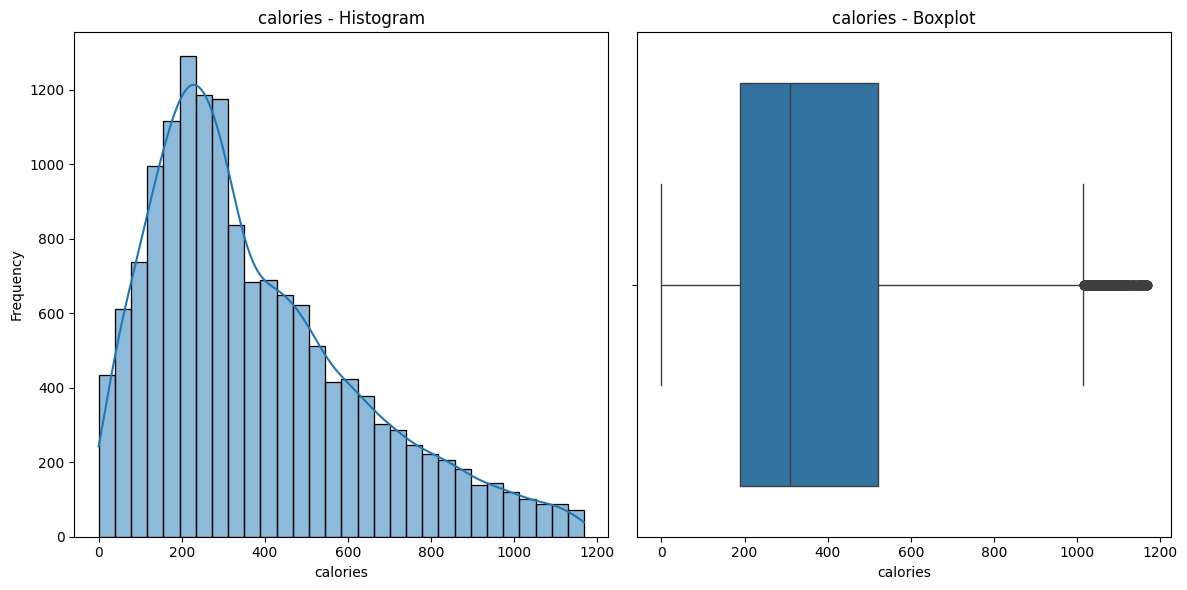

In [19]:
plot_distribution(clean_ndf, "calories")

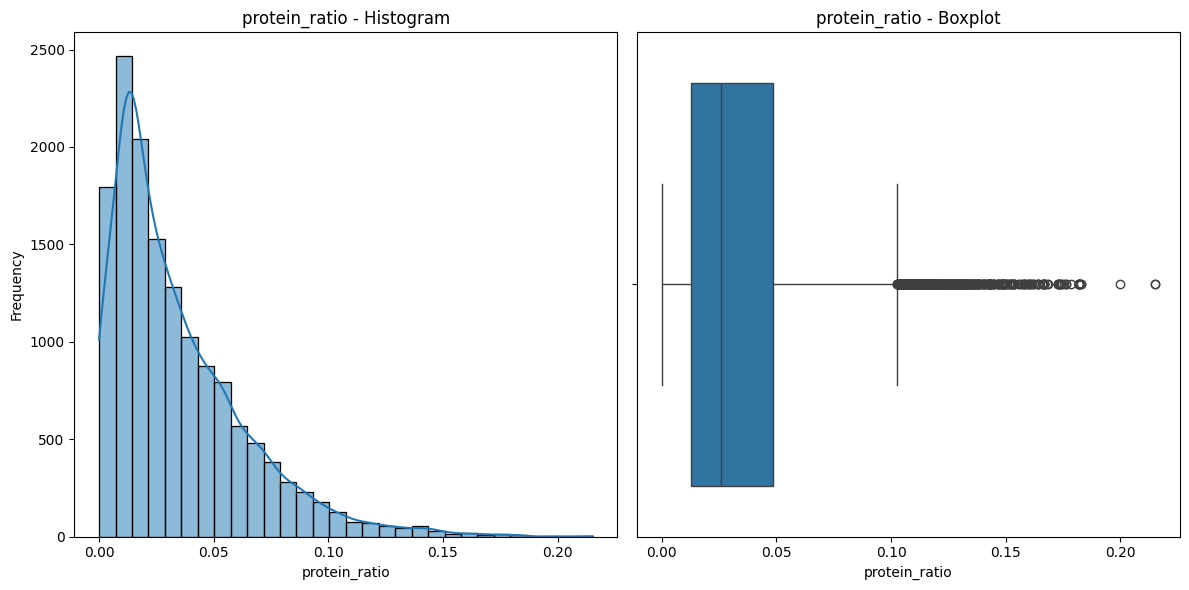

In [20]:
plot_distribution(clean_ndf, "protein_ratio")

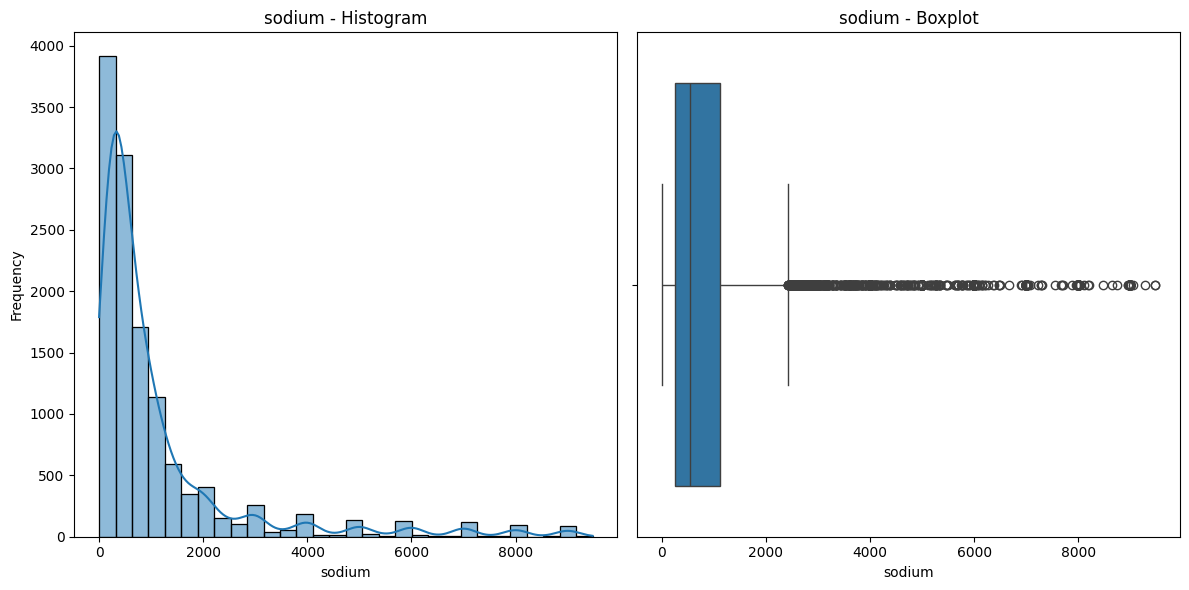

In [21]:
plot_distribution(clean_ndf, "sodium")

Os valores de sódio ainda parecem muito distantes de um comportamento natural, considerando que a *US Food and Drug Administration* (FDA) recomenda o consumo diário de **2300 mg** de sódio para cada adulto.  
  
Dessa forma, optou-se por repetir a operação de remover valores distantes do **IQR** nessa variável

In [22]:
clean_ndf = remove_outliers_iqr(clean_ndf, ["sodium"])

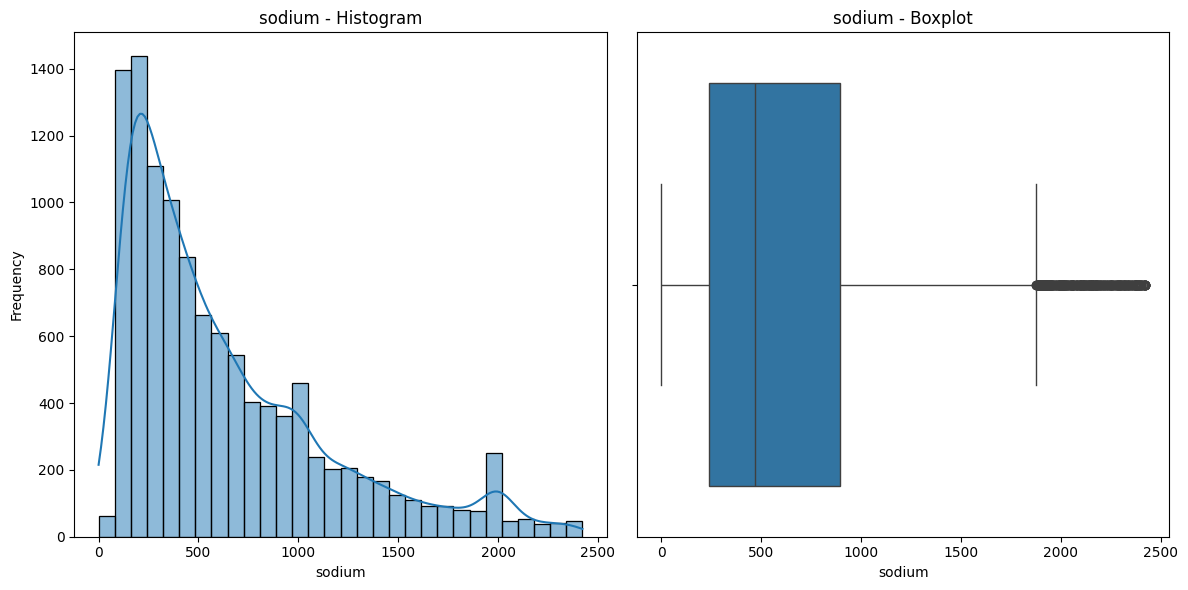

In [23]:
plot_distribution(clean_ndf, "sodium")

## Limpeza & tratamento dos dados <a id='section_12'></a>

Iniciando pelo escalonamento dos dados, para viabilizar análises de correlação

In [24]:
def scale_dataframe(df):
    df_scaled = (df - df.min()) / (df.max() - df.min())
    return df_scaled

In [25]:
scaled_ndf = scale_dataframe(clean_ndf)
scaled_ndf.head()

,fat,calories,protein,rating,sodium,fat_ratio,protein_ratio
0,0.097222,0.364726,0.476190,0.500,0.230801,0.131455,0.327074
1,0.319444,0.345034,0.285714,0.875,0.594137,0.456576,0.207444
2,0.097222,0.141267,0.095238,0.750,0.068126,0.339394,0.168889
3,NaN,NaN,NaN,1.000,NaN,NaN,NaN
4,0.444444,0.468322,0.317460,0.625,0.186623,0.468007,0.169815


In [26]:
scaled_ndf.describe()

,fat,calories,protein,rating,sodium,fat_ratio,protein_ratio
count,14803.000000,14957.000000,14811.000000,20100.000000,11329.000000,14606.000000,14430.000000
mean,0.275378,0.323057,0.219018,0.742612,0.263766,0.401509,0.158550
std,0.233538,0.217171,0.241447,0.268629,0.214775,0.213148,0.137118
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.097222,0.162671,0.047619,0.750000,0.098679,0.274002,0.058940
50%,0.222222,0.264555,0.111111,0.875000,0.193229,0.416321,0.119324
75%,0.402778,0.445205,0.333333,0.875000,0.369116,0.549020,0.225934
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot: >

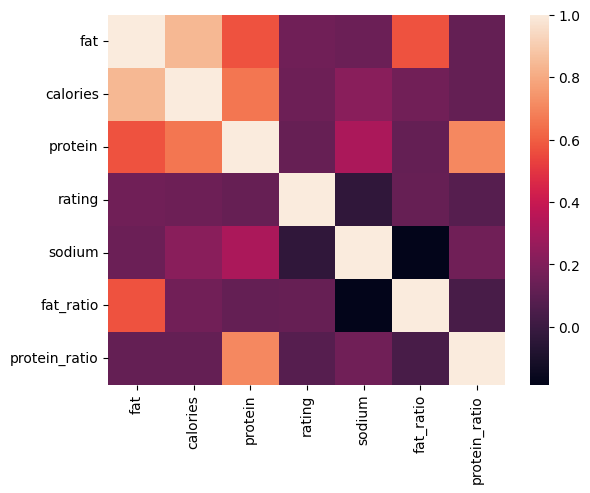

In [27]:
sns.heatmap(scaled_ndf.corr())

- O sódio é a variável numérica com menor correlação com a avaliação da receita;  
  
  
- A quantidade de calorias apresenta correlação positiva com gorduras e proteinas, refletindo o conteúdo energético desses macronutrientes;  
  
  
- Gorduras tem a maior densidade energética dentre todos macronutrientes, o que justifica a forte correlação positiva com a quantidade calórica;  
  
  
- A correlação positiva entre sódio e proteína sugere que receitas mais salgadas tendem a ser mais proteicas (e/ou vice-versa);  
  
  
- Alimentos mais proteicos tendem a ocorrer junto a maior teor de gordura na natureza, principalmente os de origem animal, o que justificaria a correlação positiva entre proteínas e gordura.

<AxesSubplot: xlabel='protein', ylabel='calories'>

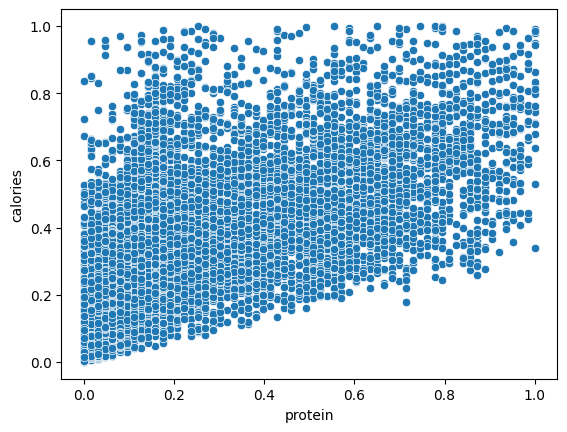

In [28]:
sns.scatterplot(scaled_ndf, x="protein", y="calories")

<AxesSubplot: xlabel='fat', ylabel='calories'>

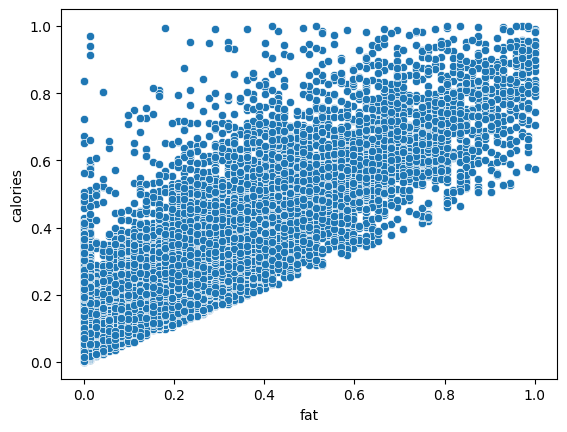

In [29]:
sns.scatterplot(scaled_ndf, x="fat", y="calories")

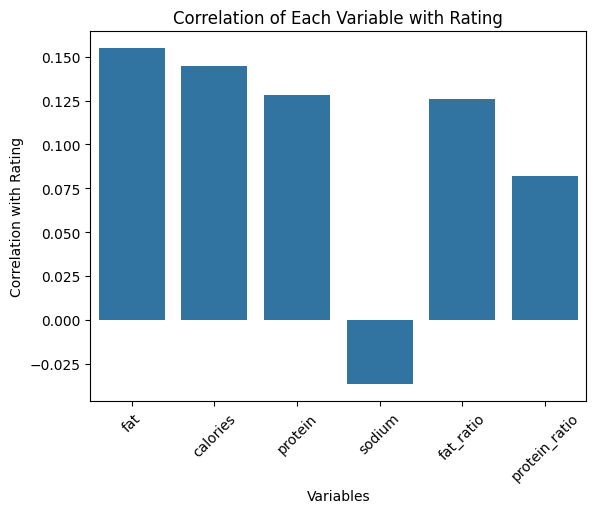

In [30]:
correlations = scaled_ndf.corr()["rating"].drop("rating")

sns.barplot(x=correlations.index, y=correlations.values)
plt.xticks(rotation=45)
plt.xlabel("Variables")
plt.ylabel("Correlation with Rating")
plt.title("Correlation of Each Variable with Rating")
plt.show()

# Análise exploratória das variáveis textuais <a id='section_20'></a>

In [31]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20130 entries, 0 to 20129
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   directions   20111 non-null  object             
 1   fat          15908 non-null  float64            
 2   date         20111 non-null  datetime64[ns, UTC]
 3   categories   20111 non-null  object             
 4   calories     15976 non-null  float64            
 5   desc         13495 non-null  object             
 6   protein      15929 non-null  float64            
 7   rating       20100 non-null  float64            
 8   title        20111 non-null  object             
 9   ingredients  20111 non-null  object             
 10  sodium       15974 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(5), object(5)
memory usage: 1.7+ MB


In [32]:
traw = raw[["directions", "categories", "title", "ingredients"]].copy()

In [33]:
tdf = traw.dropna()
tdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20111 entries, 0 to 20129
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   directions   20111 non-null  object
 1   categories   20111 non-null  object
 2   title        20111 non-null  object
 3   ingredients  20111 non-null  object
dtypes: object(4)
memory usage: 785.6+ KB


In [34]:
def convert_columns_to_list(df, columns):
    df_converted = df.copy()
    
    for column in columns:
        df_converted[column] = df_converted[column].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
    
    return(df_converted)

In [35]:
tdf = convert_columns_to_list(tdf, ["directions", "categories", "ingredients"])

In [36]:
tdf.head()

,directions,categories,title,ingredients
0,"[1. Place the stock, lentils, celery, carrot, ...","[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...","Lentil, Apple, and Turkey Wrap","[4 cups low-sodium vegetable or chicken stock,..."
1,[Combine first 9 ingredients in heavy medium s...,"[Food Processor, Onion, Pork, Bake, Bastille D...",Boudin Blanc Terrine with Red Onion Confit,"[1 1/2 cups whipping cream, 2 medium onions, c..."
2,[In a large heavy saucepan cook diced fennel a...,"[Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...",Potato and Fennel Soup Hodge,"[1 fennel bulb (sometimes called anise), stalk..."
3,[Heat oil in heavy large skillet over medium-h...,"[Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...",Mahi-Mahi in Tomato Olive Sauce,"[2 tablespoons extra-virgin olive oil, 1 cup c..."
4,[Preheat oven to 350°F. Lightly grease 8x8x2-i...,"[Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...",Spinach Noodle Casserole,"[1 12-ounce package frozen spinach soufflé, th..."


In [37]:
def encode_tags(df, columns):
    output = df.copy()
    all_tag_columns = []

    for column in columns:
        # O set extrai tags unicas
        tags = set(output[column].explode())
        print(f"Found {len(tags)} tags for {column}")
        
        # Gerar pra cada tag uma serie indicando presenca/ausencia
        for tag in tags:
            tag_column = output[column].apply(lambda x: tag in x if isinstance(x, list) else False)
            tag_column.name = f"{column}_{tag}"
            all_tag_columns.append(tag_column)
        
        output.drop(column, axis=1, inplace=True)

    output = pd.concat([output] + all_tag_columns, axis=1)
    
    return output

In [38]:
encoded = encode_tags(tdf, ["categories"])

Found 733 tags for categories


In [39]:
encoded.shape

(20111, 736)

In [40]:
encoded["rating"] = raw["rating"]

C:\Windows\Temp\ipykernel_3848\2308776331.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encoded["rating"] = raw["rating"]


In [41]:
cats = encoded.drop(["directions", "title", "ingredients"], axis=1).copy()
cats.columns

Index(['categories_Lemon Juice', 'categories_Bulgaria', 'categories_nan',
       'categories_Pasta', 'categories_Pasadena', 'categories_Ramekin',
       'categories_Pickles', 'categories_Oat', 'categories_Cream Cheese',
       'categories_Quinoa',
       ...
       'categories_Minneapolis', 'categories_Ham', 'categories_Dallas',
       'categories_Pistachio', 'categories_Brisket', 'categories_Sake',
       'categories_Fish', 'categories_Wheat/Gluten-Free',
       'categories_Honeydew', 'rating'],
      dtype='object', length=734)

In [42]:
def plot_top_bottom_correlations(df, target_column="rating"):
    correlations = df.corr()[target_column].drop(target_column)
    
    top_bottom_correlations = pd.concat([correlations.nlargest(10), correlations.nsmallest(10)])
    
    plt.figure(figsize=(10, 8))
    sns.barplot(x=top_bottom_correlations.values, y=top_bottom_correlations.index, palette="viridis")
    plt.title(f"Top 10 and Bottom 10 Correlations with {target_column}")
    plt.xlabel("Correlation Coefficient")
    plt.ylabel("Variables")
    plt.show()

C:\Windows\Temp\ipykernel_3848\944699066.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_bottom_correlations.values, y=top_bottom_correlations.index, palette="viridis")


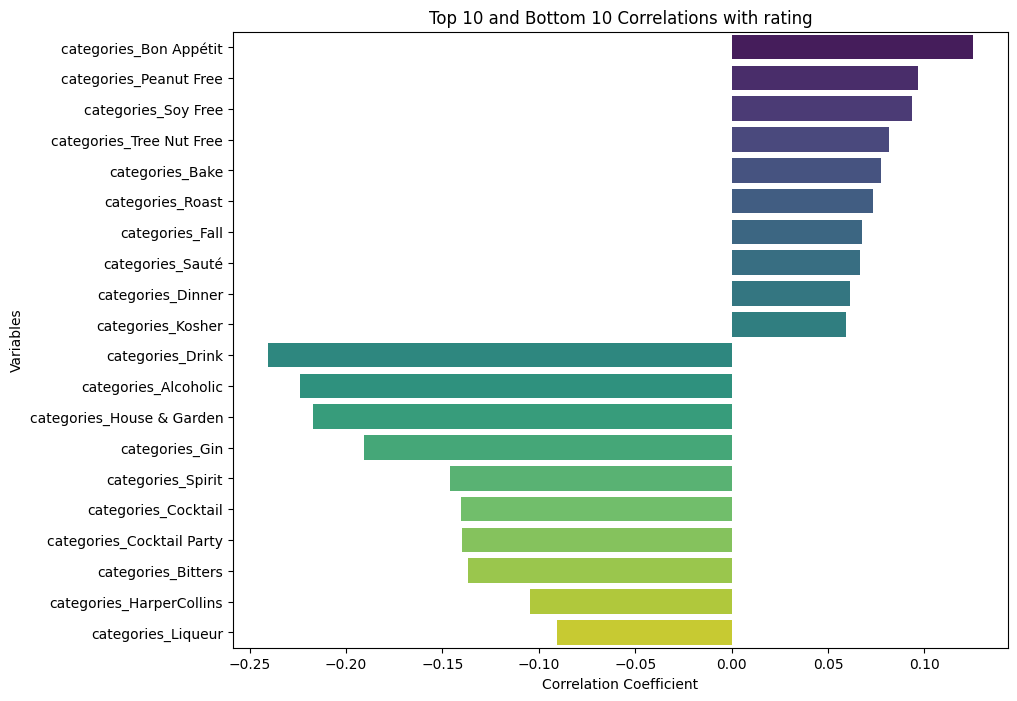

In [43]:
plot_top_bottom_correlations(cats)

Receitas direcionadas a pessoas com restrições alimentares parecem ter melhores avaliações  
Receitas relacionadas a bebidas alcoolicas tendem a ter piores avaliações

In [44]:
def parse_list(df, column_name):
    df[f"parsed_{column_name}"] = df[column_name].apply(lambda x: " ".join(x) if isinstance(x, list) else "")
    return df

In [45]:
tdf = parse_list(tdf, "categories")
tdf.head()

,directions,categories,title,ingredients,parsed_categories
0,"[1. Place the stock, lentils, celery, carrot, ...","[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...","Lentil, Apple, and Turkey Wrap","[4 cups low-sodium vegetable or chicken stock,...",Sandwich Bean Fruit Tomato turkey Vegetable Ki...
1,[Combine first 9 ingredients in heavy medium s...,"[Food Processor, Onion, Pork, Bake, Bastille D...",Boudin Blanc Terrine with Red Onion Confit,"[1 1/2 cups whipping cream, 2 medium onions, c...",Food Processor Onion Pork Bake Bastille Day Ne...
2,[In a large heavy saucepan cook diced fennel a...,"[Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...",Potato and Fennel Soup Hodge,"[1 fennel bulb (sometimes called anise), stalk...",Soup/Stew Dairy Potato Vegetable Fennel Gourme...
3,[Heat oil in heavy large skillet over medium-h...,"[Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...",Mahi-Mahi in Tomato Olive Sauce,"[2 tablespoons extra-virgin olive oil, 1 cup c...",Fish Olive Tomato Sauté Low Fat Low Cal High F...
4,[Preheat oven to 350°F. Lightly grease 8x8x2-i...,"[Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...",Spinach Noodle Casserole,"[1 12-ounce package frozen spinach soufflé, th...",Cheese Dairy Pasta Vegetable Side Bake Vegetar...


In [46]:
def ingredient_parser(ingredients):
    # PALAVRAS PARA REMOVER, por estarem associadas a alguma medida usada em receitas
    measures = ["tsp", "tbsp", "teaspoon", "t", "tsp.", "tablespoon", "T", "tbl.", "tb", "tbsp.", "fluid ounce", "fl oz", "gill", "cup", "c", "pint", "p", "pt", "fl pt", "quart", "q", "qt", "fl qt", "gallon", "g", "gal", "ml", "milliliter", "millilitre", "cc", "mL", "l", "liter", "litre", "L", "dl", "deciliter", "decilitre", "dL", "bulb", "level", "heaped", "rounded", "whole", "pinch", "medium", "slice", "pound", "lb", "#", "ounce", "oz", "mg", "milligram", "milligramme", "g", "gram", "gramme", "kg", "kilogram", "kilogramme", "x", "of", "mm", "millimetre", "millimeter", "cm", "centimeter", "centimetre", "m", "meter", "metre", "inch", "in", "milli", "centi", "deci", "hecto", "kilo"]
    
    # PALAVRAS PARA REMOVER, por descreverem acoes ou objetos basicos presentes em qualquer cozinha/receita
    words_to_remove = ["coarsely", "removed", "equipment", 'fresh', 'oil', 'a', 'red', 'bunch', 'large', 'small', 'chopped', 'diced', 'sliced', 'minced', 'and', 'free', 'small', 'large', 'freshly', 'optional', 'good', "shredded", 'grated', 'colour', 'light', 'soft', 'washed', 'raw', 'chunk', 'piece', 'water', 'all', 'purpose', 'crushed', 'half', 'uncooked', 'crumb', 'warm', 'room', 'temperature', 'lightly', 'loaf', 'shell', 'mild', 'firm', "seeded", "frozen", "heavy", "dry", "sometimes", "called", "stalk", "package", "frozen", "thawed", "salt", "sugar", "cut", "ground", "finely", "peeled", "clove", "unsalted", "leaf", "plus", "thinly", "packed", "powder", "trimmed", "drained", "allpurpose", "crumbled", "peel", "chilled", "preferably", "coarse", "pitted", "crosswise", "quartered", "strip", "thin", "hot", "lowsalt", "special", "stem", "paste", "think", "available", "additional", "well", "lengthwise", "divided", "fine", "cored", "softened", "accompaniment", "serving", "part", "beaten", "round", "granulated", "mixed", "market", "supermarket", "reserved", "bottled", "bag", "lemon", "juice", "medium", "mixture", "bring", "bowl", "put", "least", "gently", "stick", "mix", "sprinkle", "stir", "sheet", "cut", "butter", "pepper"]

    if isinstance(ingredients, list):
        ingredients = ingredients
    else:
        ingredients = ast.literal_eval(ingredients)
    
    translator = str.maketrans('', '', string.punctuation)
    lemmatizer = WordNetLemmatizer()
    
    ingred_list = []
    for i in ingredients:
        i = i.translate(translator)

        
        items = re.split(' |-', i)
        
        # limpa as palavras
        items = [word for word in items if word.isalpha()]
        items = [word.lower() for word in items]
        items = [unidecode(word) for word in items]
        
        
        # lemmatiza 
        items = [lemmatizer.lemmatize(word) for word in items]
        
        # remove stopwords, e palavras listadas acima
        
        stop_words = set(stopwords.words('english'))
        items = [word for word in items if word not in stop_words]
        items = [word for word in items if word not in measures]
        items = [word for word in items if word not in words_to_remove]
        
        if items:
            ingred_list.append(' '.join(items))
    
    ingred_list = ' '.join(ingred_list)
    return ingred_list

In [47]:
tdf["directions"][0]

['1. Place the stock, lentils, celery, carrot, thyme, and salt in a medium saucepan and bring to a boil. Reduce heat to low and simmer until the lentils are tender, about 30 minutes, depending on the lentils. (If they begin to dry out, add water as needed.) Remove and discard the thyme. Drain and transfer the mixture to a bowl; let cool.',
 '2. Fold in the tomato, apple, lemon juice, and olive oil. Season with the pepper.',
 '3. To assemble a wrap, place 1 lavash sheet on a clean work surface. Spread some of the lentil mixture on the end nearest you, leaving a 1-inch border. Top with several slices of turkey, then some of the lettuce. Roll up the lavash, slice crosswise, and serve. If using tortillas, spread the lentils in the center, top with the turkey and lettuce, and fold up the bottom, left side, and right side before rolling away from you.']

In [48]:
tdf["parsed_ingredients"] = tdf["ingredients"].apply(lambda x: ingredient_parser(x))
tdf.head()

,directions,categories,title,ingredients,parsed_categories,parsed_ingredients
0,"[1. Place the stock, lentils, celery, carrot, ...","[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...","Lentil, Apple, and Turkey Wrap","[4 cups low-sodium vegetable or chicken stock,...",Sandwich Bean Fruit Tomato turkey Vegetable Ki...,lowsodium vegetable chicken stock dried brown ...
1,[Combine first 9 ingredients in heavy medium s...,"[Food Processor, Onion, Pork, Bake, Bastille D...",Boudin Blanc Terrine with Red Onion Confit,"[1 1/2 cups whipping cream, 2 medium onions, c...",Food Processor Onion Pork Bake Bastille Day Ne...,whipping cream onion bay garlic nutmeg dried t...
2,[In a large heavy saucepan cook diced fennel a...,"[Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...",Potato and Fennel Soup Hodge,"[1 fennel bulb (sometimes called anise), stalk...",Soup/Stew Dairy Potato Vegetable Fennel Gourme...,fennel anise discarded dice feathery garnish o...
3,[Heat oil in heavy large skillet over medium-h...,"[Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...",Mahi-Mahi in Tomato Olive Sauce,"[2 tablespoons extra-virgin olive oil, 1 cup c...",Fish Olive Tomato Sauté Low Fat Low Cal High F...,extravirgin olive onion white wine anchovy tom...
4,[Preheat oven to 350°F. Lightly grease 8x8x2-i...,"[Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...",Spinach Noodle Casserole,"[1 12-ounce package frozen spinach soufflé, th...",Cheese Dairy Pasta Vegetable Side Bake Vegetar...,spinach souffle extrawide egg noodle cooked so...


Palavras mais frequentes nos ingredientes

In [49]:
vocabulary = nltk.FreqDist()
for ingredients in tdf['parsed_ingredients']:
    ingredients = ingredients.split()
    vocabulary.update(ingredients)
for word, frequency in vocabulary.most_common(50):
    print(f'{word};{frequency}')

olive;8092
garlic;6455
onion;6279
egg;5208
white;5084
cream;4741
black;4665
dried;4567
flour;4115
chicken;3772
vinegar;3640
green;3549
vegetable;3464
tomato;3301
cheese;3194
kosher;3101
wine;2902
sauce;2772
halved;2755
parsley;2729
orange;2729
broth;2484
seed;2460
lime;2369
vanilla;2348
milk;2175
extravirgin;2133
ginger;1939
thyme;1920
sprig;1907
baking;1851
brown;1755
taste;1755
toasted;1725
cube;1725
mustard;1722
potato;1694
rice;1686
cilantro;1673
cinnamon;1637
shallot;1597
bean;1570
carrot;1559
canned;1543
bell;1524
extract;1512
bread;1475
chile;1466
celery;1420
whipping;1306


In [50]:
len(vocabulary)

6569

In [51]:
def directions_parser(instructions):
    # PALAVRAS PARA REMOVER, por descreverem items/acoes basicas presentes em qualquer receita/cozinha
    words_to_remove = ["place", "add", "remove", "discard", "fold", "let", "spread", "slice", "top", "set", "occsaionally", "bring" "serve", "prepare", "transfer", "combine", "reduce", "cool", "chill", "divide", "season", "drain","salt", "large", "small", "remaining", "sugar", "side", "ahead", "using", "day", "together", "set", "teaspoon", "spoon", "occasionally", "cover", "tablespoon", "covered", "temperature", "toss", "serve", "center", "inch", "stand", "well", "taste", "ingredient", "turn", "arrange", "plate", "lemon", "juice", "medium", "mixture", "bring", "bowl", "put", "least", "gently", "stick", "mix", "sprinkle", "stir", "sheet", "cut", "butter", "pepper"]
    
    translator = str.maketrans('', '', string.punctuation)
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    
    parsed_instructions = []
    
    if isinstance(instructions, list):
        instructions = instructions
    else:
        instructions = ast.literal_eval(instructions)
    
    for step in instructions:

        step = step.translate(translator)
        words = re.split(r'[\s-]+', step)  
        

        words = [unidecode(word.lower()) for word in words if word.isalpha()]
        

        words = [lemmatizer.lemmatize(word) for word in words]
        words = [word for word in words if word not in stop_words and word not in words_to_remove]
        

        if words:
            parsed_instructions.append(' '.join(words))
    
    return ' '.join(parsed_instructions)

In [52]:
tdf["parsed_directions"] = tdf["directions"].apply(lambda x: directions_parser(x))
tdf.head()

,directions,categories,title,ingredients,parsed_categories,parsed_ingredients,parsed_directions
0,"[1. Place the stock, lentils, celery, carrot, ...","[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...","Lentil, Apple, and Turkey Wrap","[4 cups low-sodium vegetable or chicken stock,...",Sandwich Bean Fruit Tomato turkey Vegetable Ki...,lowsodium vegetable chicken stock dried brown ...,stock lentil celery carrot thyme saucepan boil...
1,[Combine first 9 ingredients in heavy medium s...,"[Food Processor, Onion, Pork, Bake, Bastille D...",Boudin Blanc Terrine with Red Onion Confit,"[1 1/2 cups whipping cream, 2 medium onions, c...",Food Processor Onion Pork Bake Bastille Day Ne...,whipping cream onion bay garlic nutmeg dried t...,first heavy saucepan shallot simmer heat minut...
2,[In a large heavy saucepan cook diced fennel a...,"[Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...",Potato and Fennel Soup Hodge,"[1 fennel bulb (sometimes called anise), stalk...",Soup/Stew Dairy Potato Vegetable Fennel Gourme...,fennel anise discarded dice feathery garnish o...,heavy saucepan cook diced fennel onion moderat...
3,[Heat oil in heavy large skillet over medium-h...,"[Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...",Mahi-Mahi in Tomato Olive Sauce,"[2 tablespoons extra-virgin olive oil, 1 cup c...",Fish Olive Tomato Sauté Low Fat Low Cal High F...,extravirgin olive onion white wine anchovy tom...,heat oil heavy skillet mediumhigh heat onion s...
4,[Preheat oven to 350°F. Lightly grease 8x8x2-i...,"[Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...",Spinach Noodle Casserole,"[1 12-ounce package frozen spinach soufflé, th...",Cheese Dairy Pasta Vegetable Side Bake Vegetar...,spinach souffle extrawide egg noodle cooked so...,preheat oven lightly grease glass baking dish ...


Palavras mais frequentes no passo-a-passo das receitas

In [53]:
vocabulary = nltk.FreqDist()

for directions in tdf['parsed_directions']:
    directions = directions.split()
    vocabulary.update(directions)
for word, frequency in vocabulary.most_common(25):
    print(f'{word};{frequency}')

minute;47964
heat;31313
oil;15602
cup;15279
water;14940
pan;14044
cook;13742
oven;12844
stirring;11943
skillet;11037
baking;10206
hour;9493
sauce;9275
boil;8818
simmer;8616
onion;8414
whisk;8380
saucepan;7987
heavy;7734
preheat;7354
garlic;7263
cream;6971
brown;6776
tender;6687
dough;6687


In [54]:
len(vocabulary)

10298

In [55]:
def full_recipe_parser(row):
    output = row["title"] + " " + row["parsed_ingredients"] + " " + row["parsed_directions"]
    return(output)

In [56]:
tdf["full_recipe"] = tdf.apply(lambda row: full_recipe_parser(row), axis=1)
tdf.head()

,directions,categories,title,ingredients,parsed_categories,parsed_ingredients,parsed_directions,full_recipe
0,"[1. Place the stock, lentils, celery, carrot, ...","[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...","Lentil, Apple, and Turkey Wrap","[4 cups low-sodium vegetable or chicken stock,...",Sandwich Bean Fruit Tomato turkey Vegetable Ki...,lowsodium vegetable chicken stock dried brown ...,stock lentil celery carrot thyme saucepan boil...,"Lentil, Apple, and Turkey Wrap lowsodium vege..."
1,[Combine first 9 ingredients in heavy medium s...,"[Food Processor, Onion, Pork, Bake, Bastille D...",Boudin Blanc Terrine with Red Onion Confit,"[1 1/2 cups whipping cream, 2 medium onions, c...",Food Processor Onion Pork Bake Bastille Day Ne...,whipping cream onion bay garlic nutmeg dried t...,first heavy saucepan shallot simmer heat minut...,Boudin Blanc Terrine with Red Onion Confit wh...
2,[In a large heavy saucepan cook diced fennel a...,"[Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...",Potato and Fennel Soup Hodge,"[1 fennel bulb (sometimes called anise), stalk...",Soup/Stew Dairy Potato Vegetable Fennel Gourme...,fennel anise discarded dice feathery garnish o...,heavy saucepan cook diced fennel onion moderat...,Potato and Fennel Soup Hodge fennel anise dis...
3,[Heat oil in heavy large skillet over medium-h...,"[Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...",Mahi-Mahi in Tomato Olive Sauce,"[2 tablespoons extra-virgin olive oil, 1 cup c...",Fish Olive Tomato Sauté Low Fat Low Cal High F...,extravirgin olive onion white wine anchovy tom...,heat oil heavy skillet mediumhigh heat onion s...,Mahi-Mahi in Tomato Olive Sauce extravirgin o...
4,[Preheat oven to 350°F. Lightly grease 8x8x2-i...,"[Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...",Spinach Noodle Casserole,"[1 12-ounce package frozen spinach soufflé, th...",Cheese Dairy Pasta Vegetable Side Bake Vegetar...,spinach souffle extrawide egg noodle cooked so...,preheat oven lightly grease glass baking dish ...,Spinach Noodle Casserole spinach souffle extr...


In [57]:
def plot_wordcloud(df, column):
    text = " ".join(str(row) for row in df[column])

    wordcloud = WordCloud(width=800, height=400, background_color='white', relative_scaling=0.35, max_words=100).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

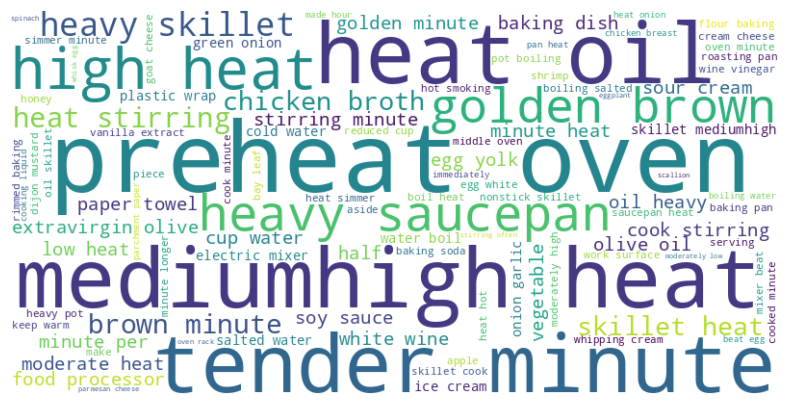

In [58]:
plot_wordcloud(tdf, "full_recipe")

In [59]:
ndf["rating"].describe()

count    20100.000000
mean         3.713060
std          1.343144
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

In [60]:
tdf["rating"] = ndf["rating"]

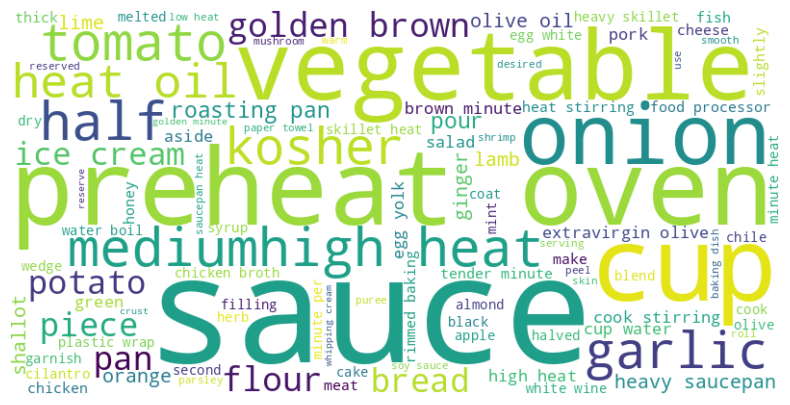

In [61]:
plot_wordcloud(tdf[tdf["rating"] == 5.0], "full_recipe")

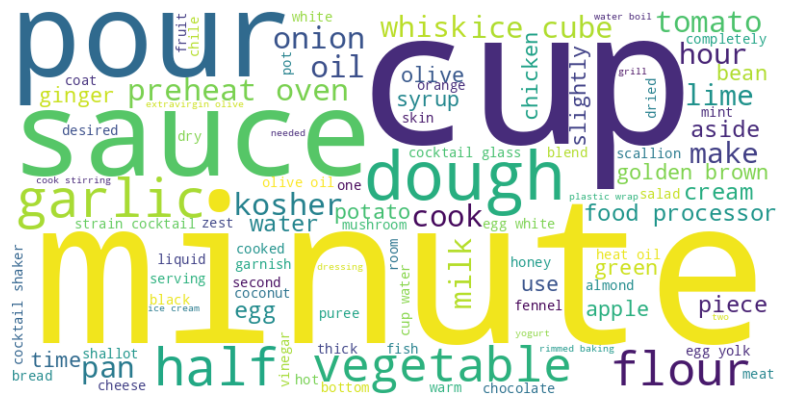

In [62]:
plot_wordcloud(tdf[tdf["rating"] <= 1.0], "full_recipe")

# Conclusões & insights <a id='section_40'></a>

- Receitas direcionadas a dietas com restrições alimentares tendem a ser melhor avaliadas  
  
  
- Receitas envolvendo bebidas alcoolicas tendem a ter avaliações mais baixas  
    
    
- Receitas mais caloricas, com mais gordura e com mais proteina tendem a ser melhor avaliadas
    
    
- Comparações entre receitas, principalmente do ponto de vista nutricional, são muito difíceis por não haver qualquer tipo de escala em volume/massa ou número de porções ou pessoas servidas  
  
  
- Para análises quantitativas mais significativas, seria necessário extrair valores de quantidades nos ingredientes e em seguida padronizar em alguma unidade específica de volume ou de massa  
    
    
- Outras análises seriam possíveis com listas organizadas de *keywords* para agrupar receitas em classes (por exemplo: receitas com *baking* nas instrucoes seriam receitas de forno, receitas com carnes nos ingredientes poderiam ser sinalizadas, etc.)
      
      
- Uma lista compreensiva de *stopwords* contextualizada ao caso de receitas culinarias aumentaria consideravelmente a qualdiade das analises realizadas. Uma forma (grosseira) de obte-la seria selecionando as palavras com frequencia muito superior as demais, definindo um fator de threshold e em seguida removendo manualmente possiveis excecoes.

# Salvando a base de dados para uso em outro problema

In [67]:
tdf["protein_ratio"] = clean_ndf["protein_ratio"]
tdf["fat_ratio"] = clean_ndf["fat_ratio"]
tdf["calories"] = clean_ndf["calories"]

In [86]:
get_top_matching_recipes(tdf, "Pizza")

,categories,title,full_recipe,rating,protein_ratio,fat_ratio,calories
0,"[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...","Lentil, Apple, and Turkey Wrap","Lentil, Apple, and Turkey Wrap lowsodium vege...",2.500,0.070423,0.016432,426.0
13418,"[Blender, Food Processor, Berry, Citrus, Desse...",Strawberry Coulis,Strawberry Coulis unsweetened strawberry sauc...,3.750,0.004566,0.000000,219.0
13425,"[Chicken, Ginger, Herb, Poultry, Vegetable, Sa...",Green-Curry Chicken with Peas and Basil,Green-Curry Chicken with Peas and Basil olive...,3.750,0.095710,0.059406,303.0
13424,"[Cheese, Pasta, Vegetarian, Kid-Friendly, Heal...","Campanelle with White Beans, Lemon, and Burrata","Campanelle with White Beans, Lemon, and Burrat...",3.750,0.049587,0.020661,484.0
13423,"[Sandwich, Cheese, Olive, Vegetable, Summer, G...",Moroccan Carrot and Goat Cheese Sandwiches wit...,Moroccan Carrot and Goat Cheese Sandwiches wit...,4.375,0.025692,0.061265,506.0


In [87]:
tdf.head()

,categories,title,full_recipe,rating,protein_ratio,fat_ratio,calories,matching_tags_count
0,"[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...","Lentil, Apple, and Turkey Wrap","Lentil, Apple, and Turkey Wrap lowsodium vege...",2.500,0.070423,0.016432,426.0,0
1,"[Food Processor, Onion, Pork, Bake, Bastille D...",Boudin Blanc Terrine with Red Onion Confit,Boudin Blanc Terrine with Red Onion Confit wh...,4.375,0.044665,0.057072,403.0,0
2,"[Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...",Potato and Fennel Soup Hodge,Potato and Fennel Soup Hodge fennel anise dis...,3.750,0.036364,0.042424,165.0,0
3,"[Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...",Mahi-Mahi in Tomato Olive Sauce,Mahi-Mahi in Tomato Olive Sauce extravirgin o...,5.000,NaN,NaN,NaN,0
4,"[Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...",Spinach Noodle Casserole,Spinach Noodle Casserole spinach souffle extr...,3.125,0.036563,0.058501,547.0,0


In [88]:
traw.head()

,directions,categories,title,ingredients
0,"[1. Place the stock, lentils, celery, carrot, ...","[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...","Lentil, Apple, and Turkey Wrap","[4 cups low-sodium vegetable or chicken stock,..."
1,[Combine first 9 ingredients in heavy medium s...,"[Food Processor, Onion, Pork, Bake, Bastille D...",Boudin Blanc Terrine with Red Onion Confit,"[1 1/2 cups whipping cream, 2 medium onions, c..."
2,[In a large heavy saucepan cook diced fennel a...,"[Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...",Potato and Fennel Soup Hodge,"[1 fennel bulb (sometimes called anise), stalk..."
3,[Heat oil in heavy large skillet over medium-h...,"[Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...",Mahi-Mahi in Tomato Olive Sauce,"[2 tablespoons extra-virgin olive oil, 1 cup c..."
4,[Preheat oven to 350°F. Lightly grease 8x8x2-i...,"[Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...",Spinach Noodle Casserole,"[1 12-ounce package frozen spinach soufflé, th..."


In [89]:
tdf["ingredients"] = traw["ingredients"]

In [90]:
tdf["directions"] = traw["directions"]

In [91]:
tdf["categories"] = traw["categories"]

In [94]:
tdf['full_recipe'] = tdf['full_recipe'] + ' ' + tdf['categories'].apply(lambda x: ' | '.join(x))

In [95]:
tdf.head()

,categories,title,full_recipe,rating,protein_ratio,fat_ratio,calories,matching_tags_count,ingredients,directions
0,"[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...","Lentil, Apple, and Turkey Wrap","Lentil, Apple, and Turkey Wrap lowsodium vege...",2.500,0.070423,0.016432,426.0,0,"[4 cups low-sodium vegetable or chicken stock,...","[1. Place the stock, lentils, celery, carrot, ..."
1,"[Food Processor, Onion, Pork, Bake, Bastille D...",Boudin Blanc Terrine with Red Onion Confit,Boudin Blanc Terrine with Red Onion Confit wh...,4.375,0.044665,0.057072,403.0,0,"[1 1/2 cups whipping cream, 2 medium onions, c...",[Combine first 9 ingredients in heavy medium s...
2,"[Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...",Potato and Fennel Soup Hodge,Potato and Fennel Soup Hodge fennel anise dis...,3.750,0.036364,0.042424,165.0,0,"[1 fennel bulb (sometimes called anise), stalk...",[In a large heavy saucepan cook diced fennel a...
3,"[Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...",Mahi-Mahi in Tomato Olive Sauce,Mahi-Mahi in Tomato Olive Sauce extravirgin o...,5.000,NaN,NaN,NaN,0,"[2 tablespoons extra-virgin olive oil, 1 cup c...",[Heat oil in heavy large skillet over medium-h...
4,"[Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...",Spinach Noodle Casserole,Spinach Noodle Casserole spinach souffle extr...,3.125,0.036563,0.058501,547.0,0,"[1 12-ounce package frozen spinach soufflé, th...",[Preheat oven to 350°F. Lightly grease 8x8x2-i...


In [96]:
tdf.shape

(20111, 10)

In [97]:
tdf.drop("matching_tags_count", axis=1, inplace=True)

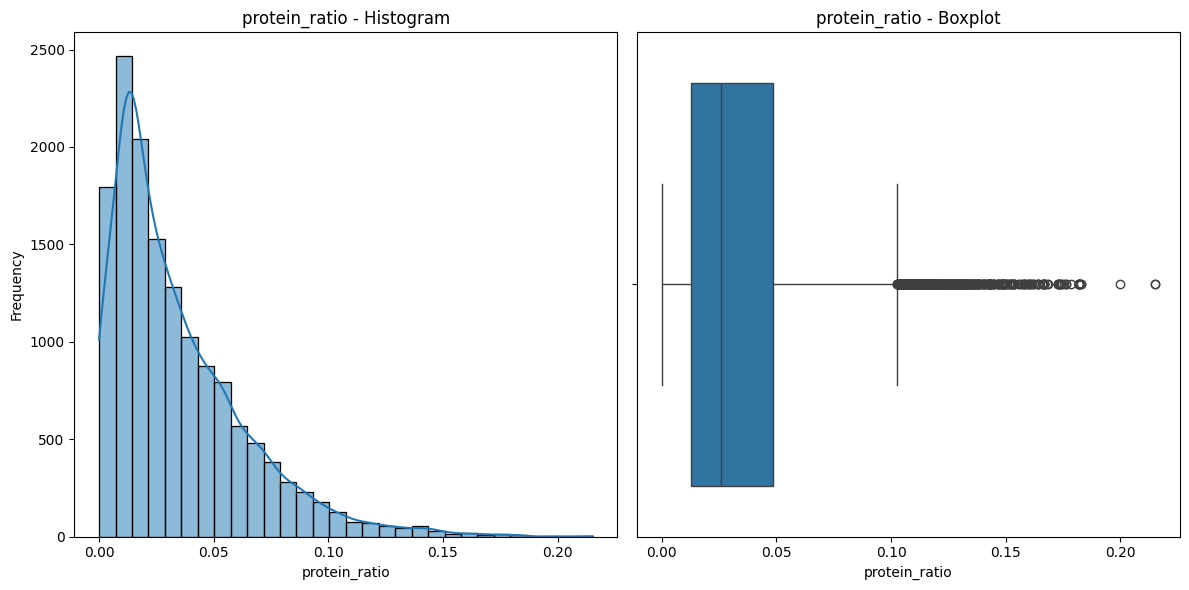

In [98]:
plot_distribution(tdf, "protein_ratio")

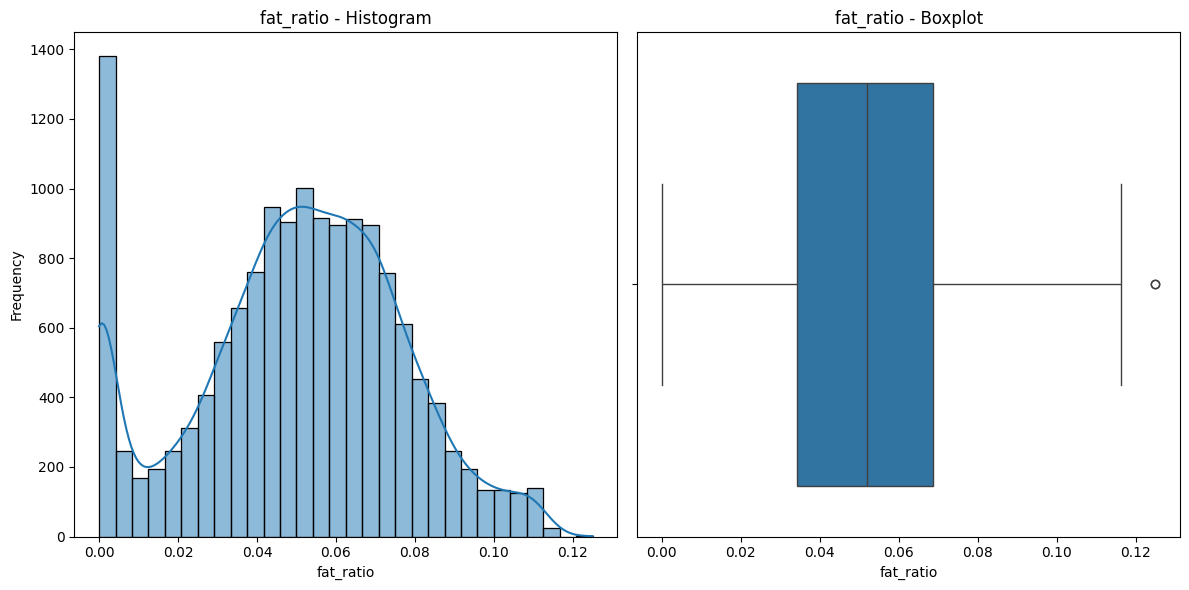

In [99]:
plot_distribution(tdf, "fat_ratio")

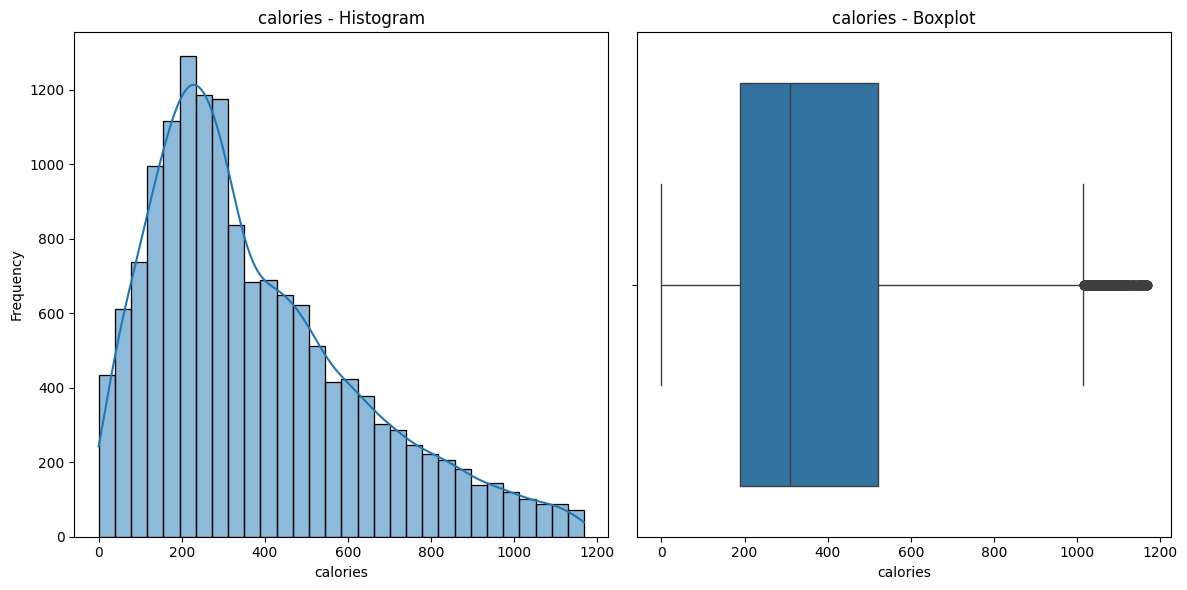

In [100]:
plot_distribution(tdf, "calories")

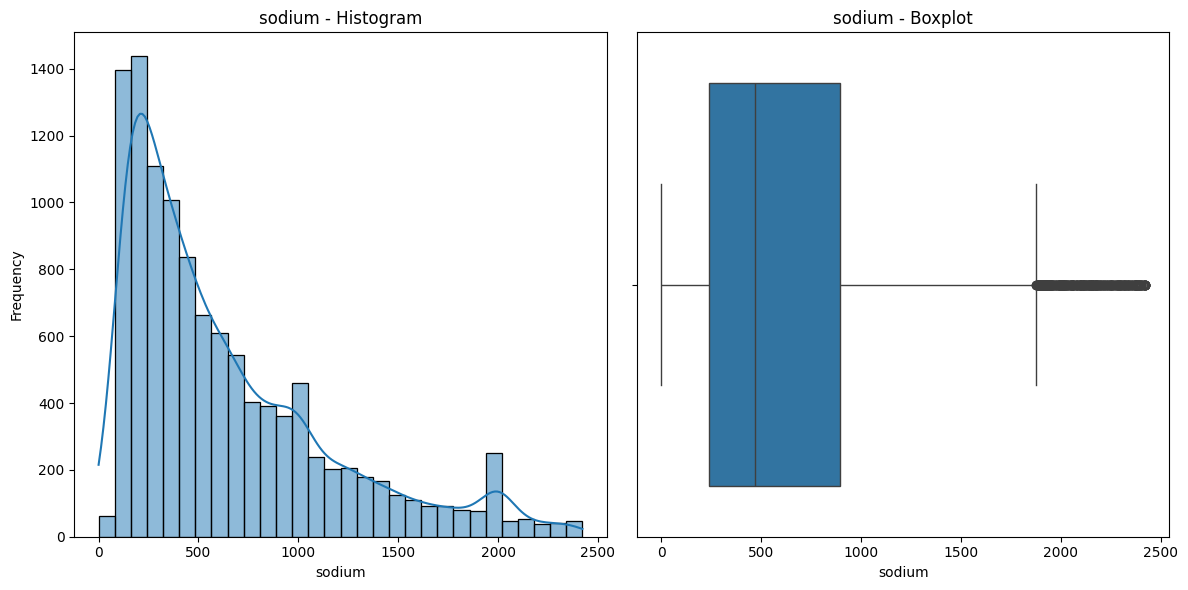

In [102]:
tdf["sodium"] = clean_ndf["sodium"]
plot_distribution(tdf, "sodium")

In [103]:
# definindo thresholds para aplicar tags
protein_threshold = tdf['protein_ratio'].quantile(0.75)
sodium_threshold = tdf['sodium'].quantile(0.25)
fat_threshold = tdf['fat_ratio'].quantile(0.25)
calories_threshold = tdf['calories'].quantile(0.25)

def append_labels(row):
    labels = []
    
    if row['protein_ratio'] > protein_threshold:
        labels.append("High Protein")
    
    if row['sodium'] < sodium_threshold:
        labels.append("Low Sodium")
    
    if row['fat_ratio'] == 0:
        labels.append("No Fat")
    elif row['fat_ratio'] < fat_threshold:
        labels.append("Low Fat")
    
    if row['calories'] < calories_threshold:
        labels.append("Low Calories")
    
    return row['full_recipe'] + " | " + " | ".join(labels) if labels else row['full_recipe']


tdf['full_recipe'] = tdf.apply(append_labels, axis=1)

In [104]:
tdf.to_csv("clean_recipes.csv", index=False)